In [1]:
import random
import pandas as pd
import numpy as np
import os
import math

import cv2
from tqdm.auto import tqdm
from PIL import Image
import matplotlib.pyplot as plt

import albumentations as A
import albumentations.pytorch.transforms as Apt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
CFG = {
    'IMG_HEIGHT_SIZE':64,
    'IMG_WIDTH_SIZE':224,
    'SEED':900,
}

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED'])

In [4]:
train = pd.read_csv('./data/train.csv')
train['img_path'] = train['img_path'].apply(lambda x: x.replace('./train/', './data/train/'))

In [5]:
test = pd.read_csv('./data/test.csv')
test['img_path'] = test['img_path'].apply(lambda x: x.replace('./test/', './data/test/'))

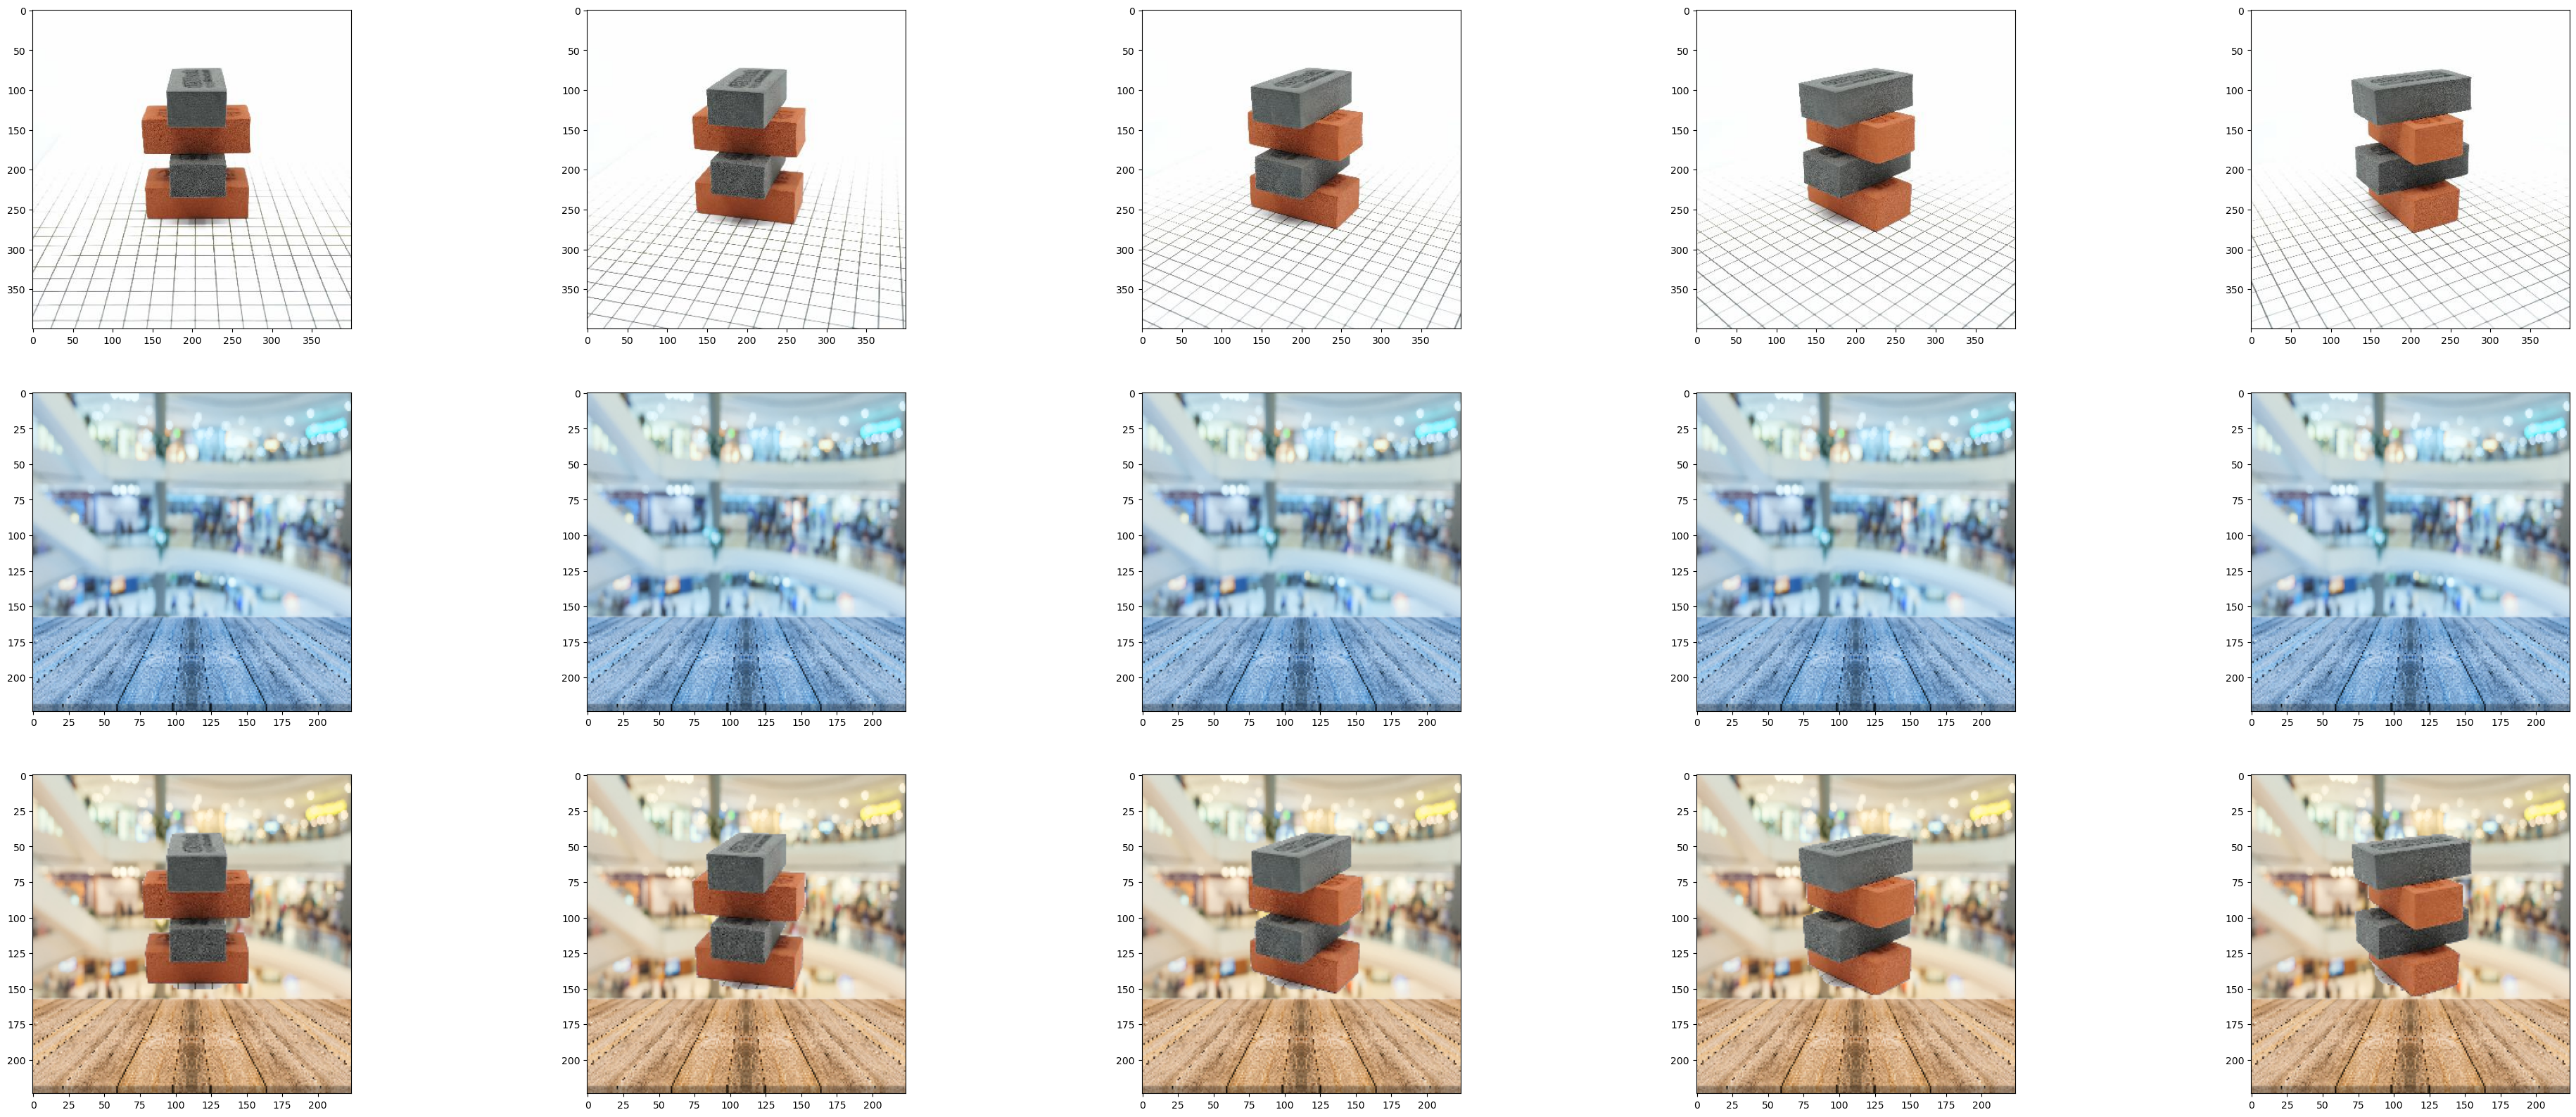

In [6]:
def train_transform_test(image):
    transform_ops = A.Compose([
        A.Resize(224,224),
        # A.Rotate(limit=5, p=1, border_mode=1),
        # A.FancyPCA(always_apply=False, p=1.0, alpha=0.1),
        # A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        Apt.ToTensorV2(p=1.0),            
    ], p=1.)
    return transform_ops(image=image)

plt.figure(figsize=(100, 20))



for i in range(90, 95):
    image = cv2.imread(train['img_path'][i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3,10,(i)%10+1)
    plt.imshow(image)
    
    # -------------------------------------------------------------------------------------------------------------------------
    
    back = cv2.imread('./data/back1.jpg')
    back = cv2.resize(back, (224, 224), interpolation=cv2.INTER_CUBIC)

    image = train_transform_test(image=back)["image"]
    
    plt.subplot(3,10,10+(10+i)%10+1)
    plt.imshow(image.permute(1, 2, 0))
    
    # -------------------------------------------------------------------------------------------------------------------------   
    image = cv2.imread(train['img_path'][i])
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_CUBIC)
    
    # 블럭 픽셀 값
    hh, ww = image.shape[:2]    
    
    # threshold on white
    lowerb = (200, 200, 200)
    upperb = (255, 255, 255)
    # Create mask to only select black
    thresh = cv2.inRange(image, lowerb, upperb)
    
    # apply morphology
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1) # CLOSING
    
    # invert morp image
    mask = 255 - morph    

    # apply mask to image
    # image = cv2.bitwise_and(image, image, mask=mask)
    
    back[mask>0] = image[mask>0]
    
    image = back
    # BGR -> RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    image = train_transform_test(image=image)["image"]    

    plt.subplot(3,10, 20+(10+i)%10+1)
    plt.imshow(image.permute(1, 2, 0))    

plt.show()

In [7]:
train = pd.read_csv('./data/train.csv')
train['img_path'] = train['img_path'].apply(lambda x: x.replace('./train/', './data/train/'))

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32994 entries, 0 to 32993
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32994 non-null  object
 1   img_path  32994 non-null  object
 2   A         32994 non-null  int64 
 3   B         32994 non-null  int64 
 4   C         32994 non-null  int64 
 5   D         32994 non-null  int64 
 6   E         32994 non-null  int64 
 7   F         32994 non-null  int64 
 8   G         32994 non-null  int64 
 9   H         32994 non-null  int64 
 10  I         32994 non-null  int64 
 11  J         32994 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 3.0+ MB


In [8]:
train

,id,img_path,A,B,C,D,E,F,G,H,I,J
0,TRAIN_00000,./data/train/TRAIN_00000.jpg,1,0,0,0,0,0,0,0,0,0
1,TRAIN_00001,./data/train/TRAIN_00001.jpg,1,0,0,0,0,0,0,0,0,0
2,TRAIN_00002,./data/train/TRAIN_00002.jpg,1,0,0,0,0,0,0,0,0,0
3,TRAIN_00003,./data/train/TRAIN_00003.jpg,1,0,0,0,0,0,0,0,0,0
4,TRAIN_00004,./data/train/TRAIN_00004.jpg,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32989,TRAIN_32989,./data/train/TRAIN_32989.jpg,1,0,0,0,1,0,1,1,1,1
32990,TRAIN_32990,./data/train/TRAIN_32990.jpg,1,0,0,0,0,1,1,1,1,1
32991,TRAIN_32991,./data/train/TRAIN_32991.jpg,1,0,0,0,0,1,1,1,1,1
32992,TRAIN_32992,./data/train/TRAIN_32992.jpg,1,0,0,0,0,1,1,1,1,1


In [9]:
os.makedirs("./data/train_back", exist_ok=True)

In [10]:
train_back = train.copy(deep=True)
train_back['img_path'] = train_back['img_path'].apply(lambda x: x.replace('./data/train/', './data/train_back/'))

In [11]:
train_back

,id,img_path,A,B,C,D,E,F,G,H,I,J
0,TRAIN_00000,./data/train_back/TRAIN_00000.jpg,1,0,0,0,0,0,0,0,0,0
1,TRAIN_00001,./data/train_back/TRAIN_00001.jpg,1,0,0,0,0,0,0,0,0,0
2,TRAIN_00002,./data/train_back/TRAIN_00002.jpg,1,0,0,0,0,0,0,0,0,0
3,TRAIN_00003,./data/train_back/TRAIN_00003.jpg,1,0,0,0,0,0,0,0,0,0
4,TRAIN_00004,./data/train_back/TRAIN_00004.jpg,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32989,TRAIN_32989,./data/train_back/TRAIN_32989.jpg,1,0,0,0,1,0,1,1,1,1
32990,TRAIN_32990,./data/train_back/TRAIN_32990.jpg,1,0,0,0,0,1,1,1,1,1
32991,TRAIN_32991,./data/train_back/TRAIN_32991.jpg,1,0,0,0,0,1,1,1,1,1
32992,TRAIN_32992,./data/train_back/TRAIN_32992.jpg,1,0,0,0,0,1,1,1,1,1


In [12]:
img_size = 224

In [16]:
for i in tqdm(range(len(train))):
    back_select = random.randint(1, 10) # 7개 배경 랜덤 선택
    
    # 블럭
    block = train['img_path'][i]
    # 배경
    background = f'./data/back{back_select}.jpg'

    # read
    image = cv2.imread(block)
    back = cv2.imread(background)
    
    image = cv2.resize(image, (img_size, img_size), interpolation=cv2.INTER_CUBIC)
    back = cv2.resize(back, (img_size, img_size), interpolation=cv2.INTER_CUBIC)
    
    # mask 생성 
    # threshold on white
    lowerb = (200, 200, 200)
    upperb = (255, 255, 255)
    # Create mask to only select black
    thresh = cv2.inRange(image, lowerb, upperb)
    
    # apply morphology
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1) # CLOSING
    
    # invert morp image
    mask = 255 - morph
    
    # 이미지 합성
    back[mask>0] = image[mask>0]
    
    output = back
    
    cv2.imwrite(f'./data/train_back/TRAIN_{i:05d}.jpg', output)

  0%|          | 0/32994 [00:00<?, ?it/s]

In [55]:
train_back.to_csv("train_back.csv", mode='w', index=False)